In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import os
import sys
sys.path.append('../')
from ecog_band.utils import *
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import torch
from torch.utils import data as Data
from sklearn.model_selection import GridSearchCV,train_test_split
import torch.nn as nn
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.patches import Rectangle
import scipy.io as scio
import matplotlib.image as mpimg
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors


bands_list = {
    'delta': (1, 4),
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30),
    'gamma': (30, 70),
    'high gamma':(70,150),
    'else2':(150,min(400/2, 300))
}
HS_list = [45,47,48,50,54,71,76,78,73]
freq_list = [400]

# plot average location across all subjects

In [18]:
def load_all_subjects_location(HS_list, freq_list):
    region_coords = {}
    for HS in HS_list:
        for freq in freq_list:
            subject_str = f"HS{HS}"
            # Load 3D electrode coordinates in MNI space
            path = '/public/DATA/covert_reading/'
            coords = scio.loadmat(path + f"/elecs/Brain2D/{subject_str}_elec_pos2D.mat")['elecmatrix']
            anatomy = scio.loadmat(f"/public/DATA/covert_reading/elecs/warped/HS{int(HS)}_elecs_all_warped.mat")['anatomy']


            for elec in range(256):
                region = anatomy[elec][3][0]
                if region not in region_coords:
                    region_coords[region] = []
                region_coords[region].append(coords[elec])  # Append each electrode's coordinates

    return region_coords

def plot_brain_surface_with_location(region_coords):
    color_set_region = {'superiorfrontal': 'grey',
        'superiortemporal': 'purple',
        'inferiorparietal': 'skyblue',
        'rostralmiddlefrontal': 'black',
        'parstriangularis': 'darkgreen',
        'superiorparietal': 'orange',
        'postcentral': 'red',
        'parsopercularis': 'gold',
        'middletemporal': 'greenyellow',
        'inferiortemporal': 'pink',
        'parsorbitalis': 'olive',
        'supramarginal': 'green',
        'lateraloccipital': 'navy',
        'bankssts': 'rosybrown',
        'precentral': 'blue',
        'caudalmiddlefrontal': 'slategrey'}
    
    # Load 2D brain image
    norm = mcolors.Normalize(vmin=0, vmax=1)
    path = '/public/DATA/covert_reading/'
    img = mpimg.imread(path + "/elecs/MNI.png")
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    region_center = []
    all_anatomy = []
    for region in region_coords.keys():
        coords_array = np.array(region_coords[region])
        region_center.append(coords_array.mean(axis=0))
        all_anatomy.append(region)

    for i, center in enumerate(region_center):
        plt.scatter(center[0], center[1], s=100, c=color_set_region[all_anatomy[i]], cmap='Reds',norm=norm, alpha=0.7)
    
    legend_handles = []
    for region, color in color_set_region.items():
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=region))
    
    # # plt.colorbar(label='Accuracy')
    # # plt.colorbar(label='Accuracy', shrink=0.65, aspect=30)
    # # plt.title(f'Electrode Accuracy across Subjects - Band')
    # plt.legend(handles=legend_handles, title="Brain Regions", loc='upper right', fontsize='small', title_fontsize='medium')

    plt.axis('off')
    plt.show()

/tmp/ipykernel_11736/3815919018.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  plt.scatter(center[0], center[1], s=100, c=color_set_region[all_anatomy[i]], cmap='Reds',norm=norm, alpha=0.7)


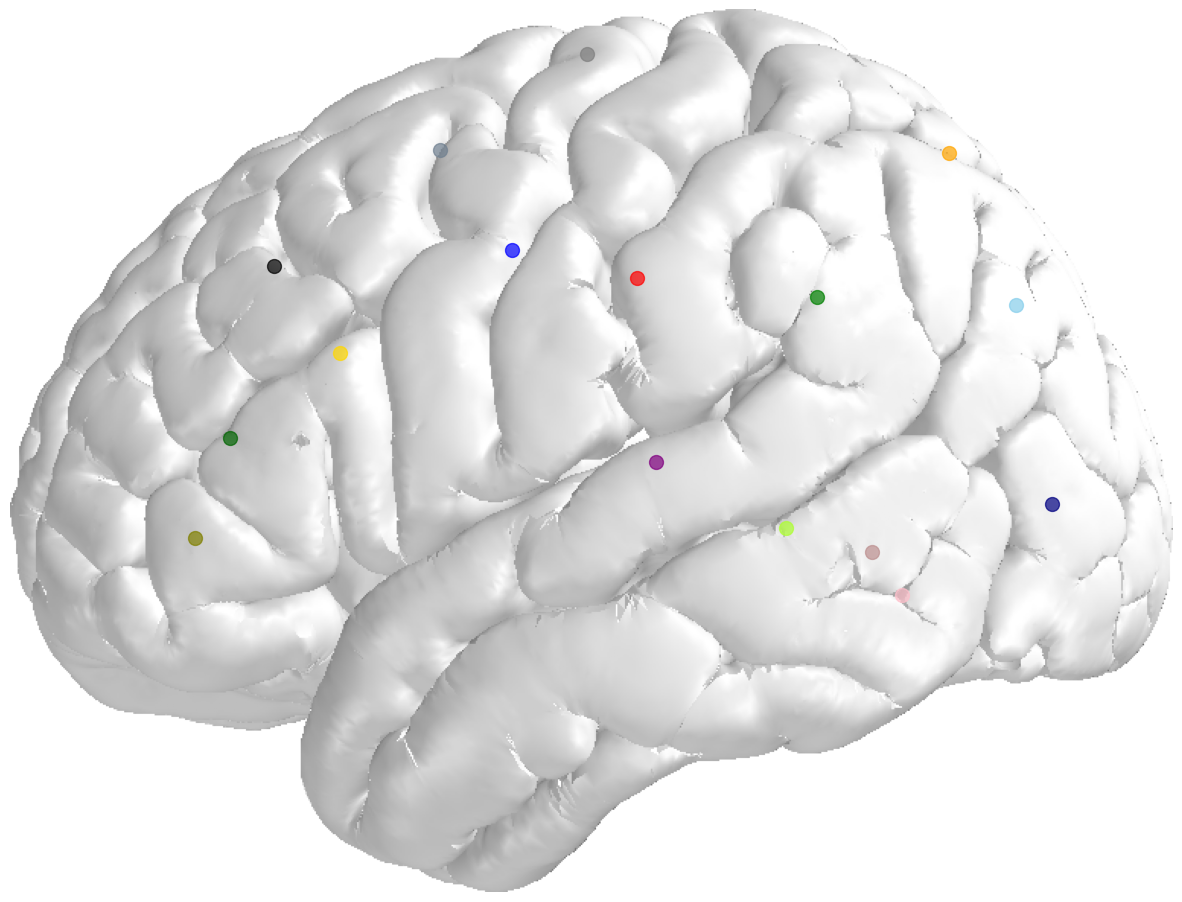

In [19]:
all_coords = load_all_subjects_location(HS_list, freq_list)
# Plot accuracy on brain surface
plot_brain_surface_with_location(all_coords)